In [2]:
from IPython.display import Image

# 인공 신경망의 한계와 딥러닝 출현
- 퍼셉트론 : 다수의 흐름이 있는 신호를 입력으로 받아 '흐른다/안 흐른다(1 또는 0)'는 정보를 앞으로 전달하는 원리로 작동하여 하나의 신호를 출력
- AND 게이트 : 모든 입력이 '1'일 때 작동. 입력 중 어떤 하나라도 '0'을 갖는다면 작동을 멈춤
- OR 게이트 : 입력에서 둘 중 하나만 '1'이거나 둘 다 '1'일 때 작동
- XOR 게이트 : 입력 두 개 중 한 개만 '1'일 때 작동
    - XOR 게이트는 데이터가 비선형적으로 분리되기 때문에 제대로 분류가 어려움
- 단층 퍼셉트론에선 AND, OR 연산에 대한 학습은 가능하지만 XOR에 대해선 학습이 불가능
- 이를 극복하기 위해 입력층과 출력층 사이에 하나 이상의 은닉층을 두어 비선형적으로 분리되는 데이터에 대해서도 학습이 가능하도록 다층 퍼셉트론(multi-layer perception)을 고안
- 입력층과 출력층 사이에 은닉층이 여러 개 있는 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 하며 딥러닝이라고 함

# 딥러닝 구조
## 딥러닝 용어
- 딥러닝의 구성 요소
    - 층(layer)
        - `입력층(input layer)` : 데이터를 받아들이는 층
        - `은닉층(hidden layer)` : 모든 입력 노드로부터 입력 값을 받아 가중합을 계산하고, 이 값을 활성화 함수에 적용하여 출력층에 전달
        - `출력층(output layer)` : 신경망의 최종 결괏값이 포함된 층
    - 가중치(weight) : 노드와 노드 간 연결 강도
    - 바이어스(bias) : 가중합에 더해 주는 상수로, 하나의 뉴런에서 활성화 함수를 거쳐 최종적으로 출력되는 값을 조절하는 역할
    - 가중합(weighted sum), 전달 함수 : 가중치와 신호의 곱을 합한 것
    - 함수(function)
        - `활성화 함수(activation function)` : 신호를 입력받아 이를 적절히 처리하여 출력해 주는 함수
        - `손실 함수(loss function)` : 가중치 학습을 위해 출력 함수의 결과와 실제 값 간의 오차를 측정하는 함수

## 가중치
- 입력 값이 연산 결과에 미치는 영향력을 조절하는 요소
- 아래 그림의 경우 w1 값이 0 혹은 0과 가까운 값이라면, x1이 아무리 큰 값이라도 (x1 x w1) 값은 0이거나 0에 가까운 값이 되어 연산 결과에 영향을 거의 미치지 못하게 됨
- 입력 값의 연산 결과를 조정하는 역할

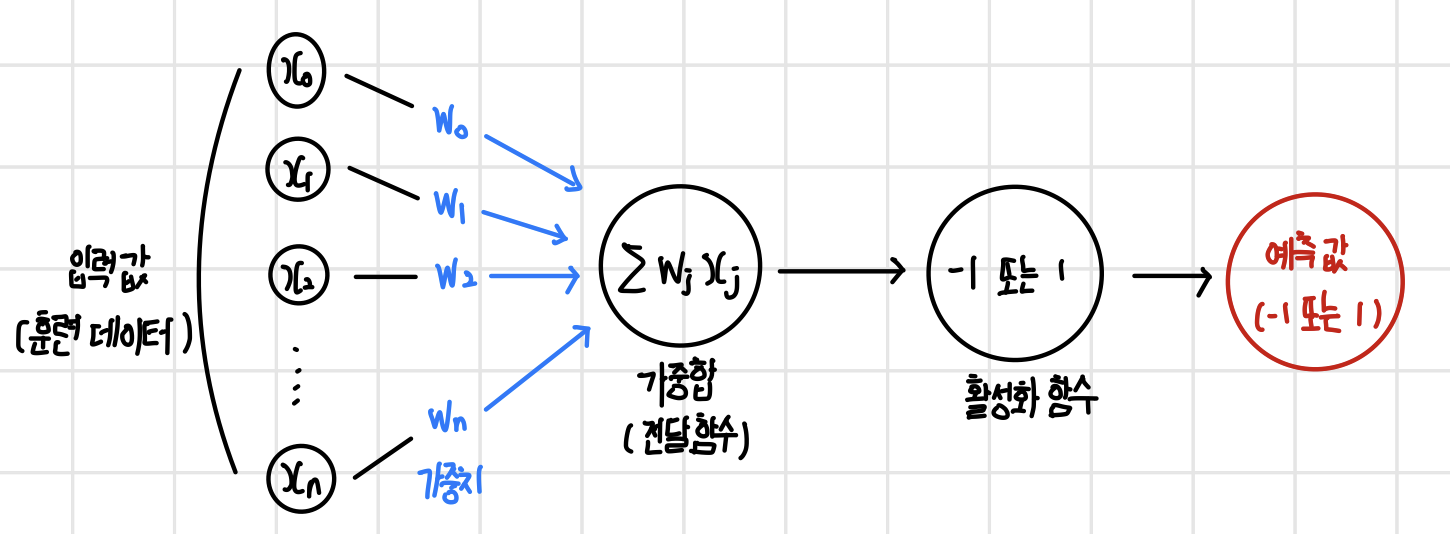

In [7]:
Image('image/가중치.png')

## 가중합(전달 함수)
- 각 노드에서 들어오는 신호에 가중치를 곱해 다음 노드로 전달하게 되는데, 이 값들을 모두 더한 합계
- 전달 함수(transfer function) : 노드의 가중합이 계산되면 이 가중합을 활성화 함수로 보냄

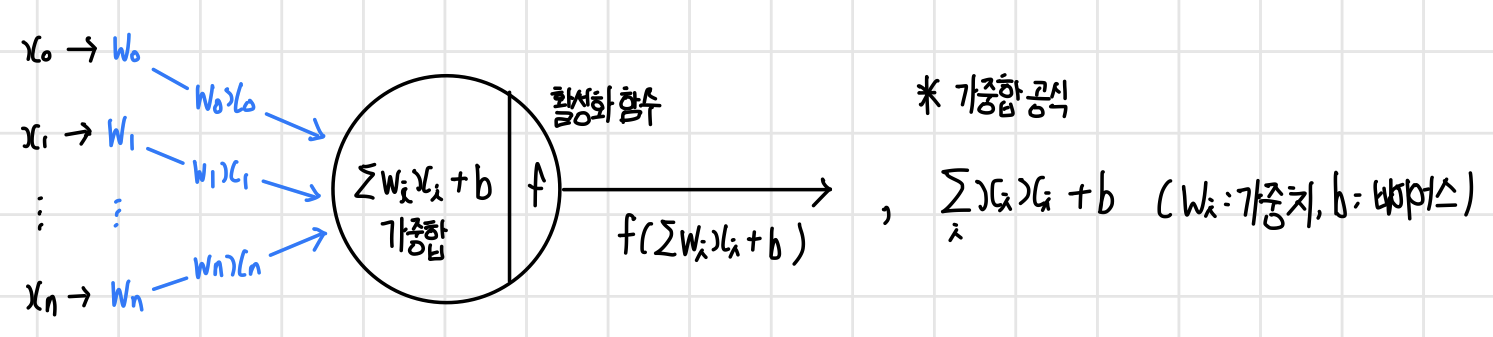

In [6]:
Image('image/가중합.png')

## 활성화 함수
- 전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수
- 비선형 함수 : 직선으로 표현할 수 없는 데이터 사이의 관계를 표현하는 함수

### 시그모이드 함수
- 선형 함수의 결과를 0~1 사이에서 비선형 형태로 변형
- 로지스틱 회귀와 같은 분류 문제를 확률적으로 표현하는 데 사용
- 딥러닝 모델의 깊이가 깊어지면 기울기가 사라지는 `기울기 소멸 문제(vanishing gradient problem)`가 발생하여 잘 사용 x

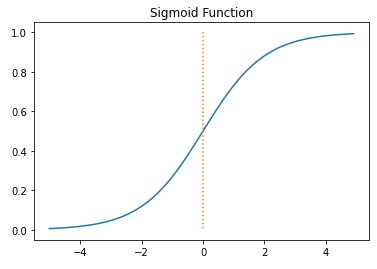

In [4]:
Image('image/시그모이드 함수.jpg')

### 하이퍼볼릭 탄젠트 함수
- 선형 함수의 결과를 -1~1 사이에서 비선형 형태로 변형
- 시그모이드에서 결괏값의 평균이 0이 아닌 양수로 편향된 문제를 해결하는 데 사용하지만 기울기 소멸 문제는 여전히 발생

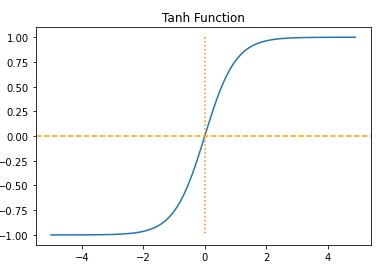

In [3]:
Image('image/하이퍼볼릭 탄젠트 함수.jpg')

### 렐루 함수
- 입력(x)이 음수일 때는 0을 출력하고, 양수일 때는 x를 출력
- `경사 하강법(gradient descent)`에 영향을 주지 않아 학습 속도가 빠르고, 기울기 소멸 문제 발생 x
- 일반적으로 은닉층에 사용되며, 하이퍼볼릭 탄젠트 함수 대비 학습 속도가 6배 빠름
- 문제는 음수 값을 입력받으면 항상 0을 출력하여 학습 능력이 감소 -> 리키 렐루(Leaky ReLU) 함수 사용

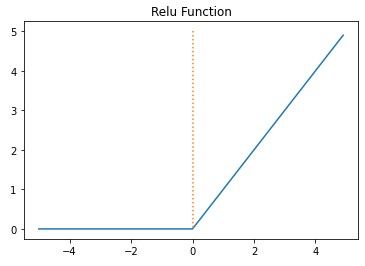

In [5]:
Image('image/렐루 함수.jpg')

### 리키 렐루 함수
- 입력 값이 음수이면 0이 아닌 0.001처럼 매우 작은 수를 반환
- 입력 값이 수렴하는 구간이 제거되어 렐루 함수를 사용할 때 생기는 문제 해결

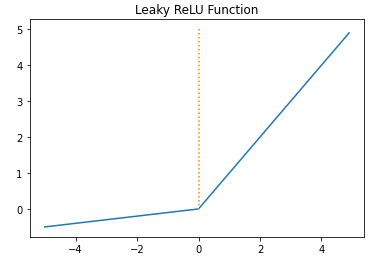

In [7]:
Image('image/리키 렐루 함수.png')

## 소프트맥스 함수
- 입력 값을 0~1 사이에 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 하는 함수
- 보통 딥러닝에서 출력 노드의 활성화 함수로 많이 사용
- n은 출력층의 뉴런 개수, y는 k번째 출력을 의미
- 분자는 입력 신호 a의 지수 함수, 분모는 모든 입력의 지수 함수 합으로 구성

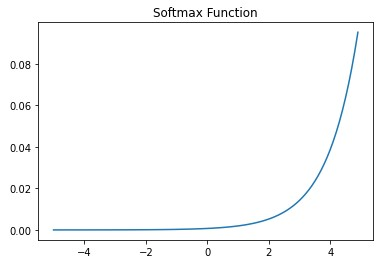

In [9]:
Image('image/소프트맥스 함수.jpg')

In [ ]:
# ReLU 함수와 Softmax 함수를 파이토치에서 구현
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 은닉층
        self.relu = torch.nn.ReLu(inplace=True)
        self.out = torch.nn.Linear(n_hidden, n_output) # 출력층
        self.softmax = torch.nn.Softmax(dim=n_output)
    
    def forward(self,x):
        x = self.hidden(x)
        x = self.relu(x) # 은닉층을 위한 ReLU 활성화 함수
        x = self.out(x)
        x = self.softmax(x)
        return x

## 손실 함수

### 경사 하강법
- `학습률(learning rate)`과 손실 함수의 순간 기울기를 이용하여 가중치를 업데이트하는 방법
    - 학습률 : 한 번 학습할 때 얼마큼 변화를 주는지에 대한 상수
- 미분의 기울기를 이용하여 오차를 비교하고 최소화하는 방향으로 이동시키는 방법
    - 오차를 구하는 방법이 손실 함수

### 손실 함수 
- 학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이가 나는지 평가하는 지표
- 손실 함수가 클수록 많이 틀렸다는 의미이며, 이 값이 '0'에 가까우면 완벽벽하게 추정할 수 있다는 의미
- 평균 제곱 오차(MSE), 크로스 엔트로피 오차(CEE)

### 평균 제곱 오차
- 실제 값과 예측 값의 차이(error)를 제곱하여 평균을 낸 것
- 실제 값과 예측 값의 차이가 클수록 MSE 값도 커지며, 반대로 이 값이 작을수록 예측력이 좋다는 것을 의미
- 회귀에서 손실 함수로 주로 사용

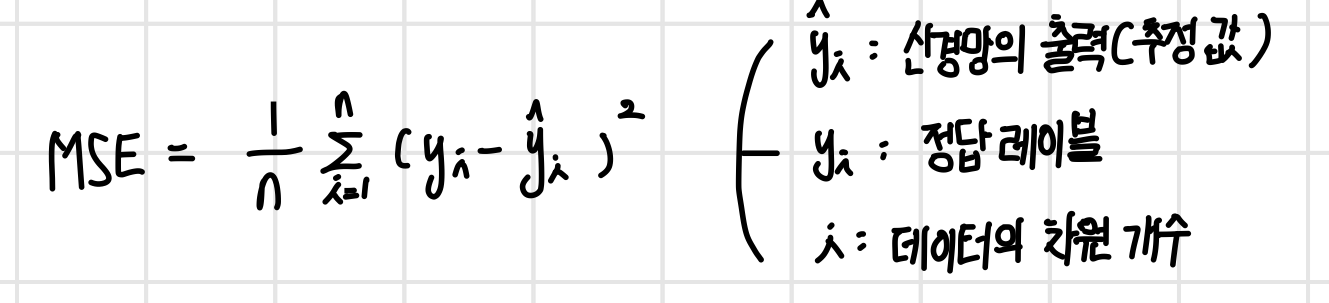

In [14]:
Image('image/MSE.png')

In [ ]:
import torch

# 평균 제곱 오차 구현
loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)

### 크로스 엔트로피 오차
- 분류(classification) 문제에서 `원-핫 인코딩(one-hot encoding)`했을 때만 사용할 수 있는 오차 계산법
- 일반적으로 분류 문제에서는 데이터의 출력을 0과 1로 구분하기 위해 시그모이드 함수를 사용하는데, 시그모이드 함수에 포함된 자연 상수 e 때문에 평균 제곱 오차를 적용하면 울퉁불퉁한 그래프가 출력되어 크로스 엔트로피 손실 함수를 사용
- 경사 하강법 과정에서 학습이 지역 최소점에서 멈출 수 있는 것을 방지하고자 자연 상수 e에 반대되는 자연 로그를 모델의 출력 값에 취함

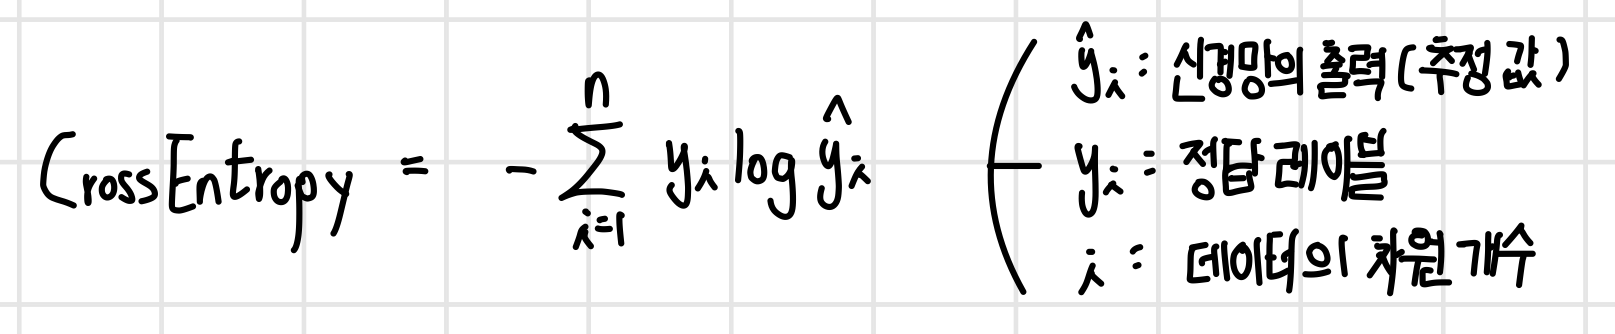

In [15]:
Image('image/크로스 엔트로피.png')

In [ ]:
# 크로스 엔트로피 오차
loss = nn.CrossEntropyLoss()
input = torch.randn(5, 6, requires_grad=True) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 숫자 생성
target = torch.empty(3, dtype=torch.long).random_(5) # 랜덤한 값
output = loss(iput, target)
output.backward()

## 딥러닝 학습

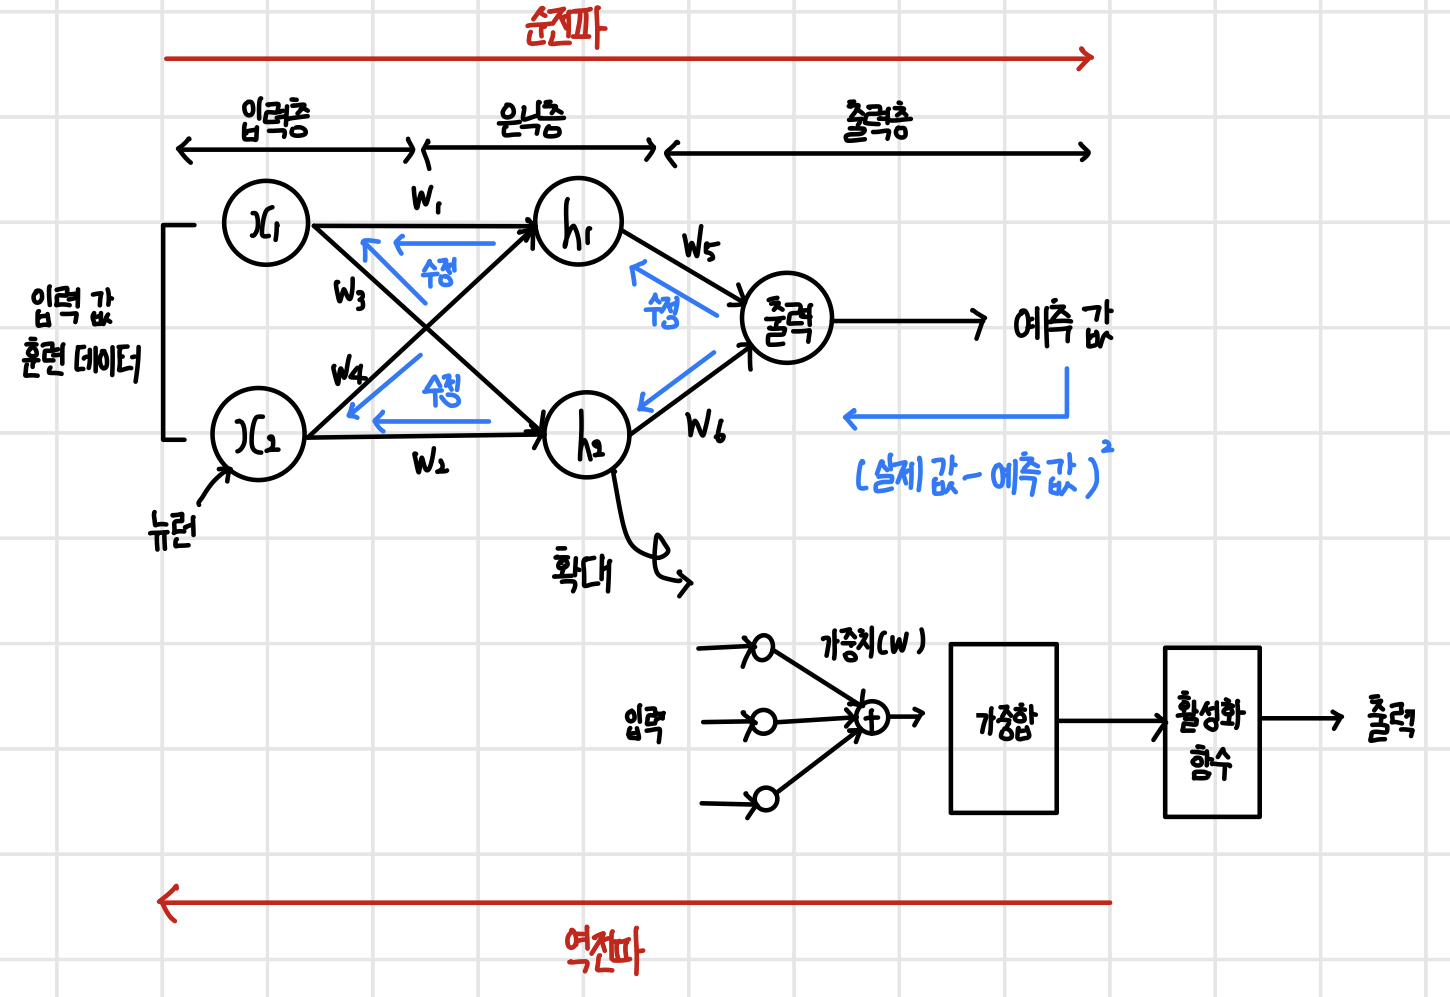

In [16]:
Image('image/순전파와 역전파.png')

- 순전파(feedforward)
    - 네트워크에 훈련 데이터가 들어올 때 발생하며, 데이터를 기반으로 예측 값을 계산하기 위해 전체 신경망을 교차해 나감
    - 모든 뉴런이 이전 층의 뉴런에서 수신한 정보에 변환(가중합 및 활성화 함수)을 적용하여 다음 층(은닉층)의 뉴런으로 전송하는 방식
    - 네트워크를 통해 입력 데이터를 전달하며 데이터가 모든 층을 통과하고 모든 뉴런이 계산을 완료하면 그 예측 값은 최종 층(출력층)에 도달
- 역전파(backpropagation)
    - 출력층으로 예측 값이 도달한 이후 손실 함수로 네트워크의 예측 값과 실제 값의 차이(오차)를 추정
        - 이때의 손실 함수 비용은 '0'이 이상적이므로 0에 가깝도록 하기 위해 모델이 훈련을 반복하면서 가중치를 조정
    - 오차가 계산되면 그 정보는 역으로 전파(출력층 -> 은닉층 -> 입력층)되므로 역전파라고 함
    - 출력층에서 시작된 손실 비용은 은닉층의 모든 뉴런으로 전파
    - 은닉층의 뉴런은 각 뉴런이 원래 출력에 기여한 상대적 기여도에 따라(가중치에 따라) 값이 달라짐
        - 예측 값과 실제 값 차이를 각 뉴런의 가중치로 미분한 후 기존 가중치 값에서 뺌
        - 이 과정을 출력층 -> 은닉층 -> 입력층 순서로 모든 뉴런에 대해 진행하여 계산된 각 뉴런 결과를 또다서 순전파의 가중치 값으로 사용

## 딥러닝의 문제점과 해결 방안

### 과적합(over-fitting)
- 딥러닝의 핵심은 활성화 함수가 적용된 은닉층을 결합하여 비선형 영역을 표현하는 것
    - 활성화 함수가 적용된 은닉층 개수가 많을수록 데이터 분류가 잘됨
- 과적합은 훈련 데이터를 과하게 학습해서 발생 -> 예측 값과 실제 값 차이인 오차가 감소하지만, 검증 데이터에 대해서는 오히려 오차가 증가
- 과적합이란, 훈련 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상
- `드롭아웃(dropout)` : 신경망 모델이 과적합되는 것을 피하기 위해 학습 과정 중 임의로 일부 노드들을 학습에서제외 

In [ ]:
# 드롭아웃 구현
class DropoutModel(torch.nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5) # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.layer3 = torch.nn.Linear(1200, 10)
        
    def forward(self,x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)

## 기울기 소멸 문제
- 은닉층이 많은 신경망에서 출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상
- 기울기가 소멸되기 때문에 학습되는 양이 '0'에 가까워져 학습이 더디게 진행되다 오차를 줄이지 못하고 그 상태로 수렴하는 현상
- 시그모이드나 하이퍼볼릭 탄젠트 대신 렐루 활성화 함수를 사용하면 해결 가능

### 성능이 나빠지는 문제
#### 경사 하강법
- 경사 하강법은 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복하는데, 이 때 성능이 나빠지는 문제가 발생
- `배치 경사 하강법(batch Gradient Descent, BGD`
    - 전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트
    - 전체 훈련 데이터셋(total training dataset)에 대해 가중치를 편미분
    - 한 스텝에 모든 훈련 데이터셋을 사용하므로 학습이 오래 걸림
- `확률적 경사 하강법(Stochastic Gradient Descent, SGD)`
    - 임의로 선택한 데이터에 대해 기울기를 계산하는 방법
    - 적은 데이터를 사용해 빠른 계산이 가능
    - 파라미터 변경 폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수 있지만 속도가 빠르다는 장점을 가짐
- `미니 배치 경사 하강법(Mini Batch Gradient Descent)`
    - 전체 데이터셋을 미니 배치 여러 개로 나누고, 미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용하여 모델을 업데이트하여 학습
    - 전체 데이터를 계산하는 것보다 빠르며, 확률적 경사 하강법보다 안정적이어서 가장 많이 사용

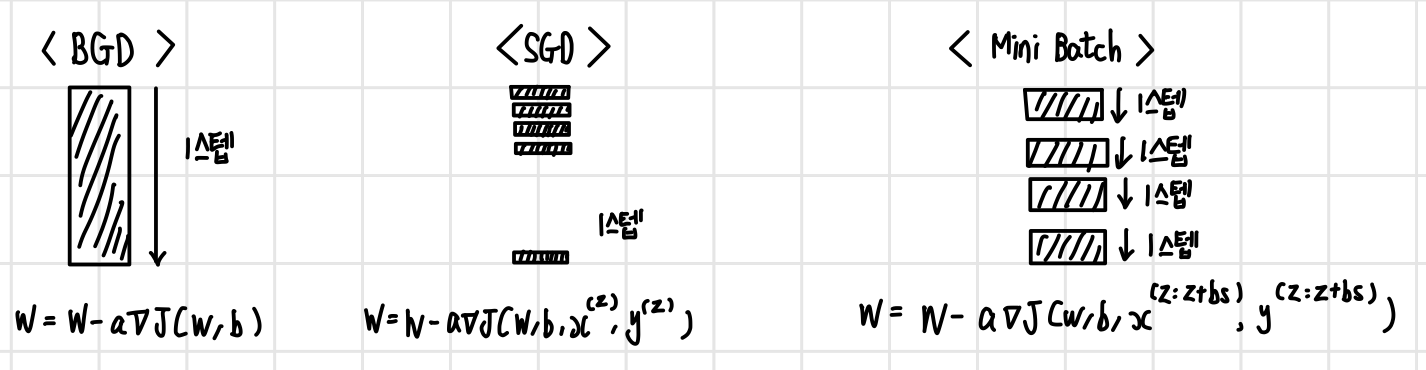

In [23]:
Image('image/경사 하강법.png')

In [ ]:
# 미니 배치 구현
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
        self.y_data = [[12], [18], [11]]
        def __len__(self):
            return len(self.x_data)
        def __getitem__(self, idx):
            x = torch.FloatTensor(self.x_data[idx])
            y = torch.FloatTensor(self.y_data[idx])
            return x, y

dataset = CustomDataset()
dataloader = DataLoader(
    dataset,
    batch_size=2, # 미니 배치 크기로 2의 제곱수를 사용
    shuffle=True) # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옴

## 옵티마이저
- 확률적 경사 하강법의 파라미터 변경 폭이 불안정한 문제를 해결하기 위해 학습 속도와 운동량을 조정하는 옵티마이저 적용 가능
- 속도를 조정하는 방법 : Adagrad, Adadelta, RMSProp
- 운동량을 조정하는 방법 : Momentum, NAG
- 속도와 운동량에 대한 혼용 방법 : Adam

### 아다그라드(Adagrad, Adaptive gradient)
- 변수(가중치)의 업데이트 횟수에 따라 학습률을 조정하는 방법
- 많이 변화한 변수는 최적 값에 근접했을 것이라는 가정 하에 작은 크기로 이동하면서 세밀하게 값을 조정 
- 적게 변화한 변수는 학습률을 크게 하여 빠르게 오차 값을 줄이고자 하는 방법
- 기울기가 0에 수렴하는 문제가 있어 사용하지 않으면, 대신 RMSProp을 사용

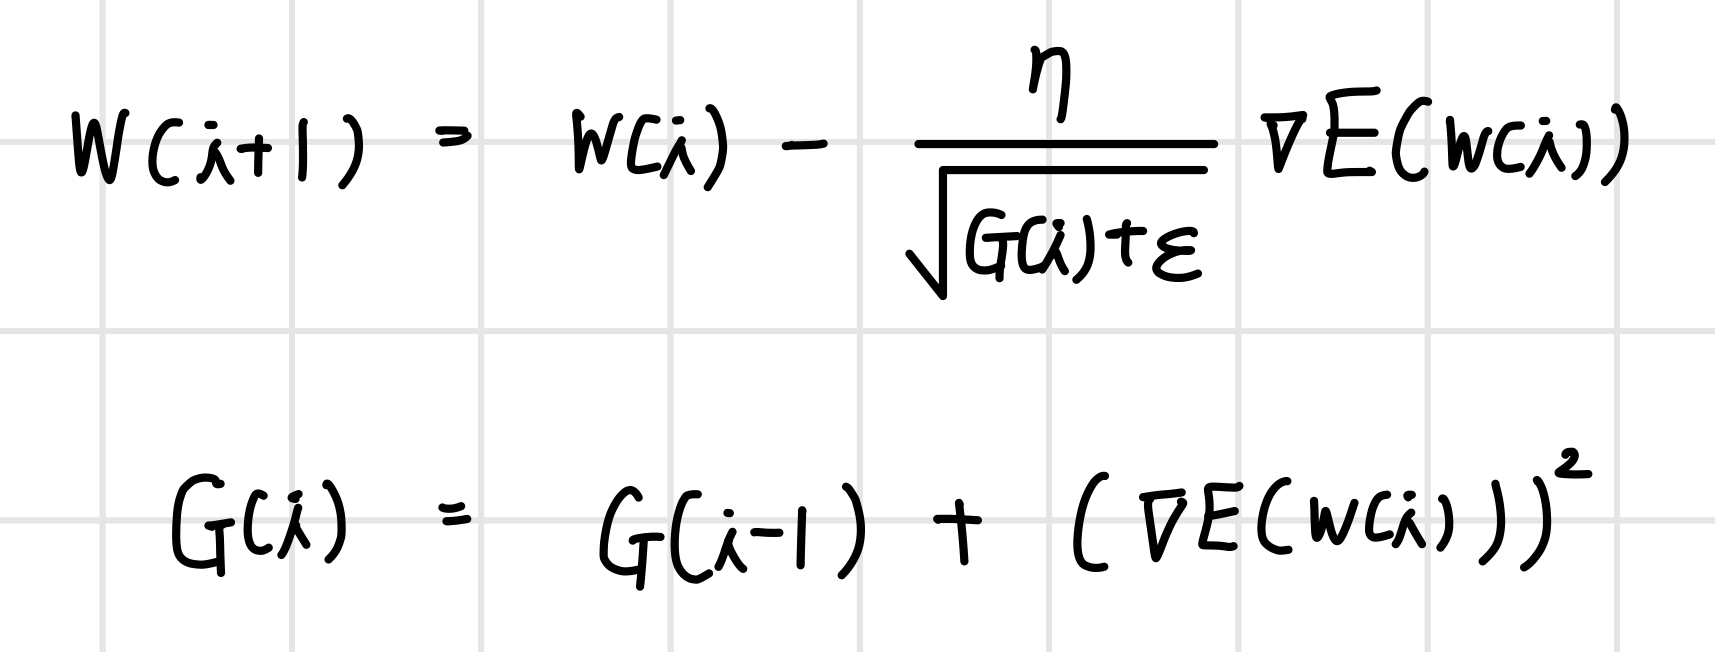

In [24]:
Image('image/아다그라드.png')

- 파라미터마다 다른 학습률을 주기 위해 함수 G 추가
- G 값은 이전 G 값의 누적(기울기 크기의 누적)
- 기울기가 크면 G 값이 커지기 때문에 학습률은 감소
- 파라미터가 많이 학습되었으면 작은 학습률로 업데이트되고, 파라미터 학습이 덜 되었으면 개선의 여지가 많기 때문에 높은 학습률로 업데이트

In [ ]:
optimizer = torch.optim.Adagrad(model.parameter(), lr=0.01) # 학습률 기본값은 le-2

### 아다델타(Adadelta, Adaptive delta)
- 아다그라드에서 G 값이 커짐에 따라 학습이 멈추는 문제를 해결하기 위해 등장한 방법
- 아다그라드의 수식에서 학습률을 D 함수(가중치의 변화량 크기를 누적한 값)로 변환해 학습률에 대한 하이퍼파라미터 필요 x

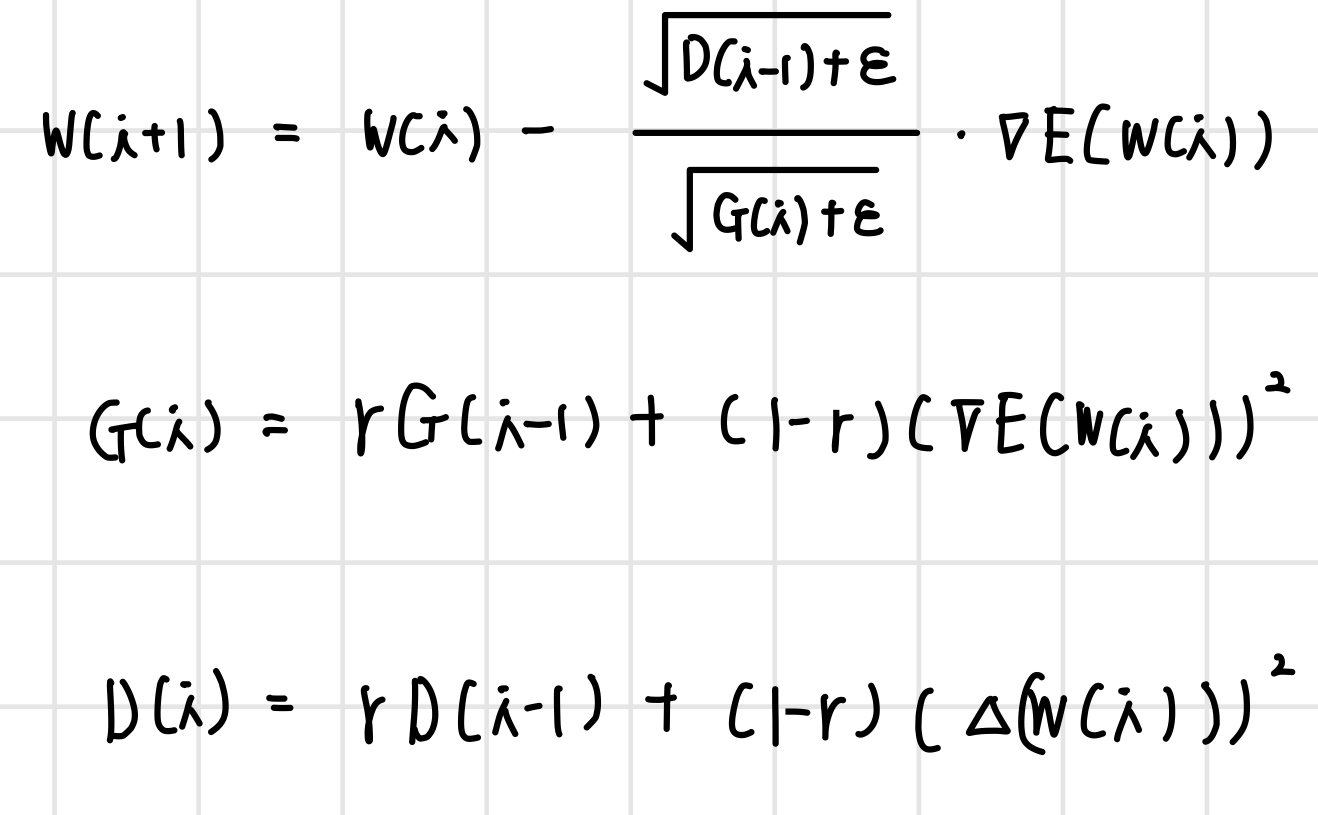

In [25]:
Image('image/아다델타.png')

In [ ]:
optimizer = torch.optim.Adadelta(model.parameters(), lr=1.0) # 학습률 기본값 1.0

### 알엠에스프롭(RMSProp)
- 아다그리드의 G(i) r값이 무한히 커지는 것을 방지
- G 함수에 감마 추가
    - G 값이 너무 크면 학습률이 작아져 학습이 안 될 수 있으므로 사용자가 감마 값을 이용하여 학습률 크기를 비율로 조정

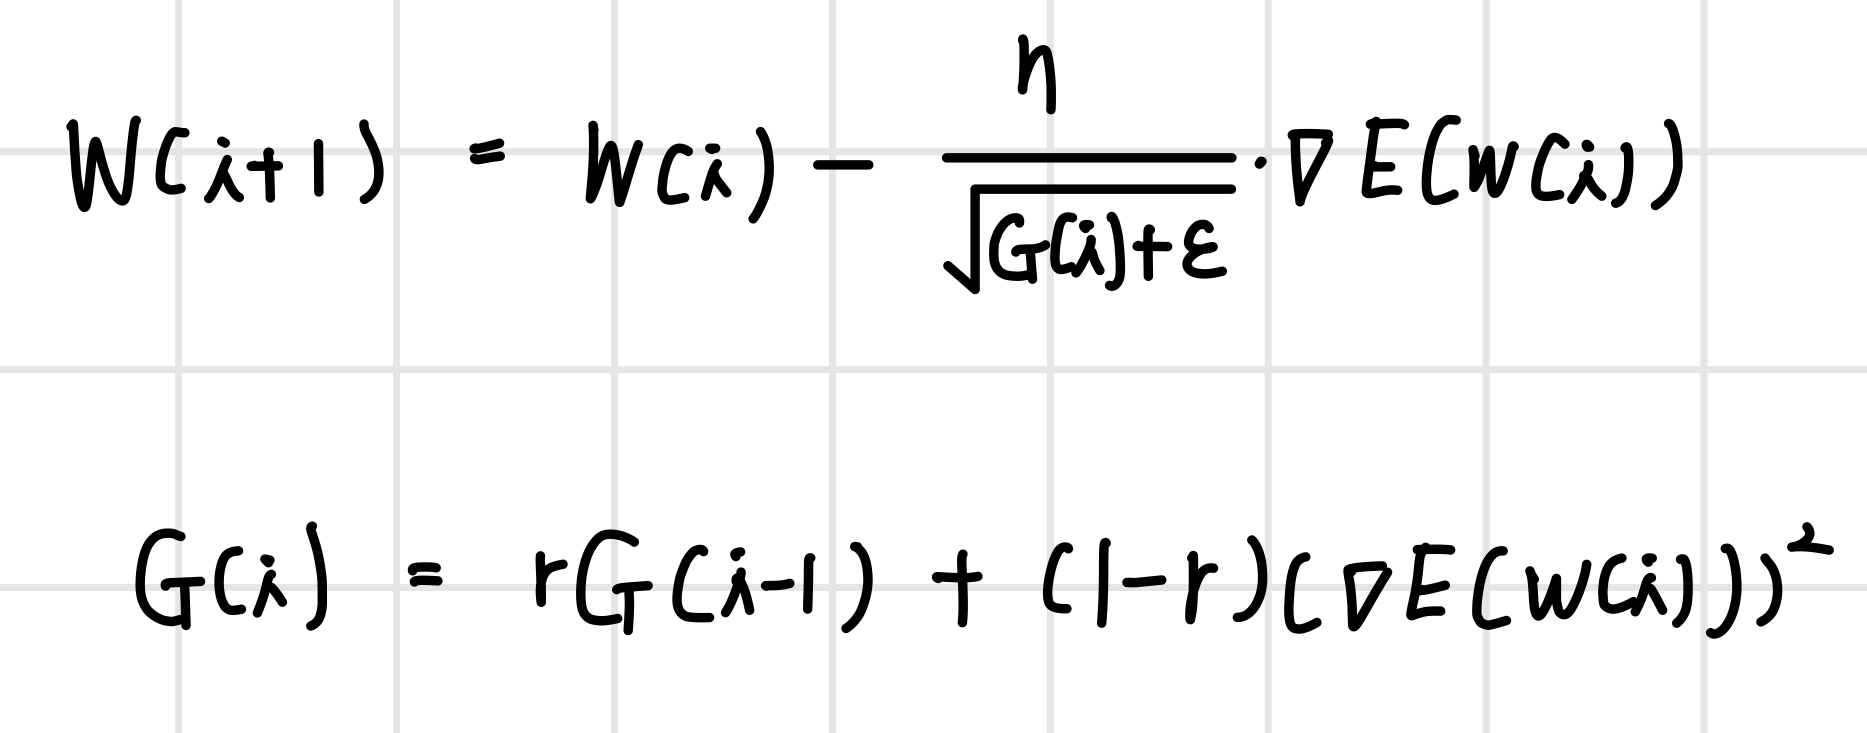

In [26]:
Image('image/RMSProp.png')

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01 ) # 학습률 기본값 1e-2

### 모멘텀(Momentum)
- 경사 하강법과 마찬가지로 매번 기울기를 구하지만, 가중치를 수정하기 전에 이전 수정 방향(+.-)을 참고하여 같은 방향으로 일정한 비율만 수정
- 수정이 양(+)의 방향과 음(-)의 방향으로 순차적으로 일어나는 지그재그 현상이 줄어듬
- 이전 이동 값을 고려하여 일정 비율만큼 다음 값을 결정하므로 관성 효과를 얻을 수 있음
- SGD(확률적 경사 하강법)과 함께 사용
- momentum 값은 0.9에서 시작하며 0.95, 0.99처럼 조금씩 증가하면서 사용

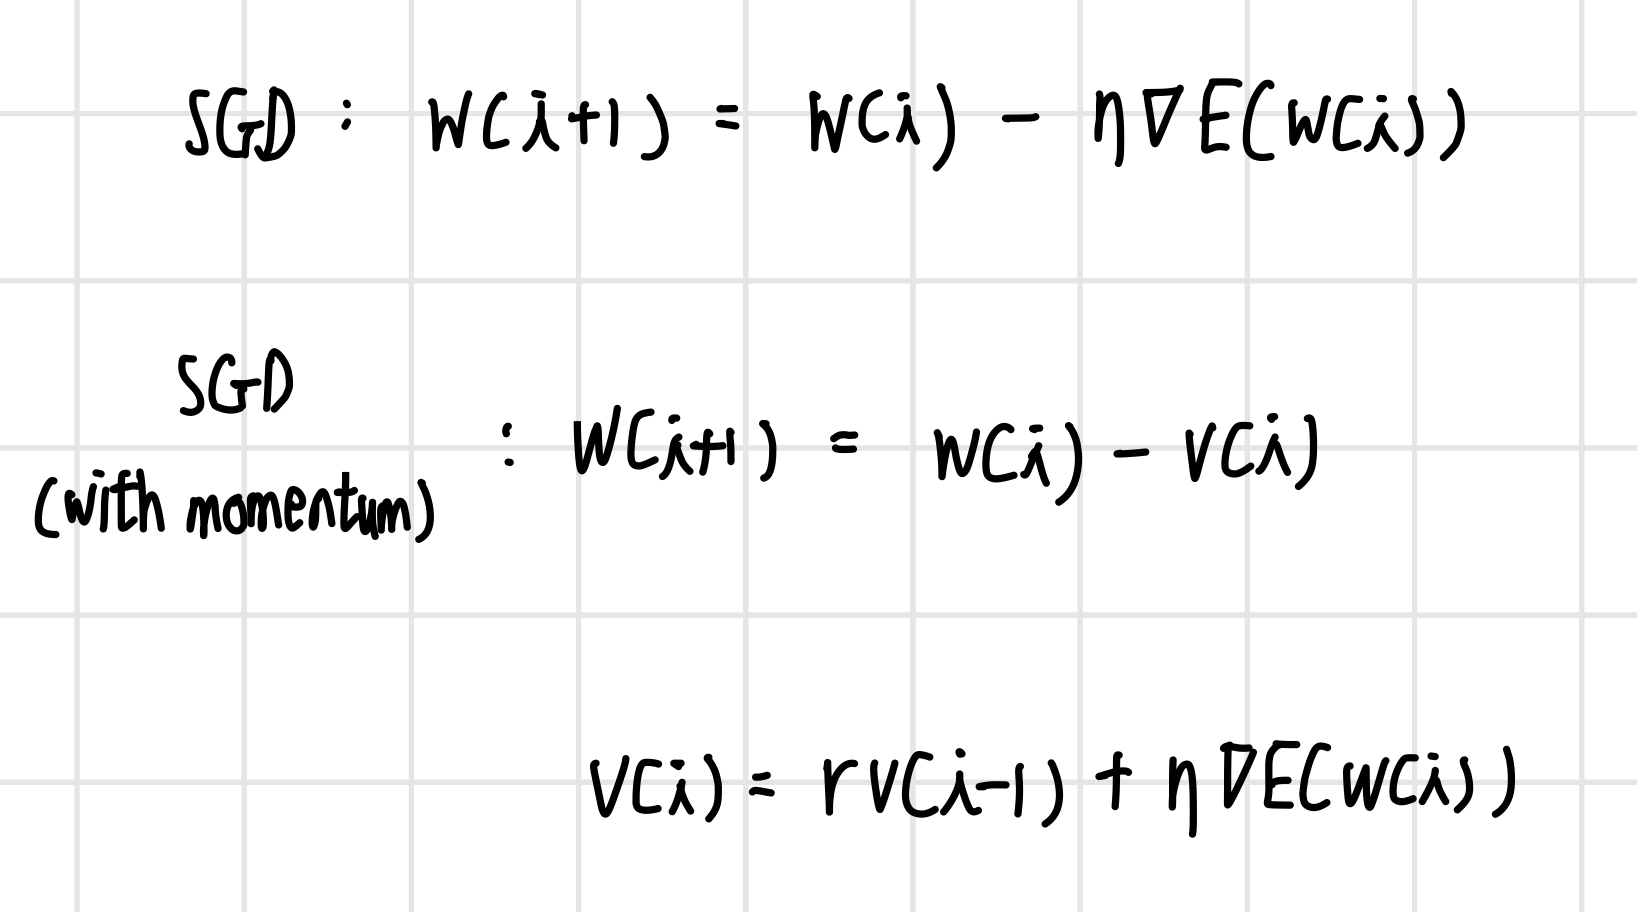

In [27]:
Image('image/모멘텀.png')

- 확률적 경사 하강법(SGD)의 경우 기울기 크기와 반대 방향만큼 가중치를 업데이트
    - 기울기가 크면 (-) 방향으로 업데이트
- SGD 모멘텀에선 기울기를 속도 V(i)로 대체
    - 이전에 학습했던 속도와 현재 기울기를 반영해서 가중치를 계산

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#### 네스테로프 모멘텀(Nesterov Accelerated Gradient, NAG)
- 모멘텀 값과 기울기 값이 더해져 실제 값을 만드는 기존 모멘텀과 달리 모멘텀 값이 적용된 지점에서 기울기 값을 계산
- 모멘텀으로 절반 정도 이동한 후 어떤 방식으로 이동해야 하는지 다시 계산하여 결정하기 때문에 모멘텀 방법의 단점을 극복
- 모멘텀의 장점인 빠른 이동 속도는 그대로 가져가면서 멈추어야 할 적절한 시점에서 제동을 거는 데 훨씬 용이

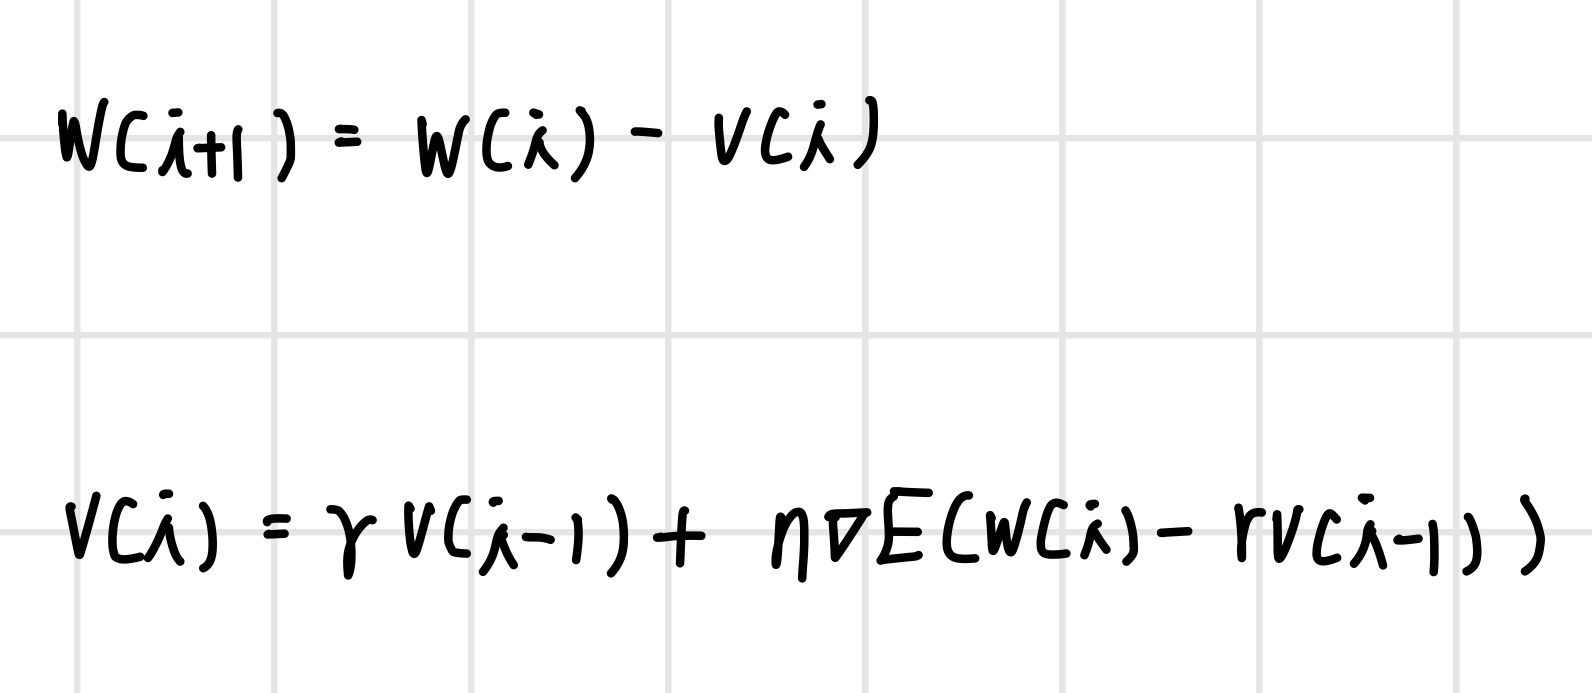

In [28]:
Image('image/네스테로프 모멘텀.png')

- 모멘텀과 비슷하지만 이전에 학습했던 속도와 현재 기울기에서 이전 속도를 뺀 변화량을 더해서 가중치를 계산
- 이전 방향과 속도를 고려하여 가중치 업데이트

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9,
                           nesterov=True) # nesterov 기본값은 False

#### 아담(Adam)
- 아담은 모멘텀과 RMSProp의 장점을 결합한 경사 하강법
- RMSProp 특징인 기울기의 제곱을 지수 평균한 값과 모멘텀 특징인 v(i)를 수식에 활용
    - RMSProp의 G 함수와 모멘텀의 v(i)를 사용하여 가중치를 업데이트

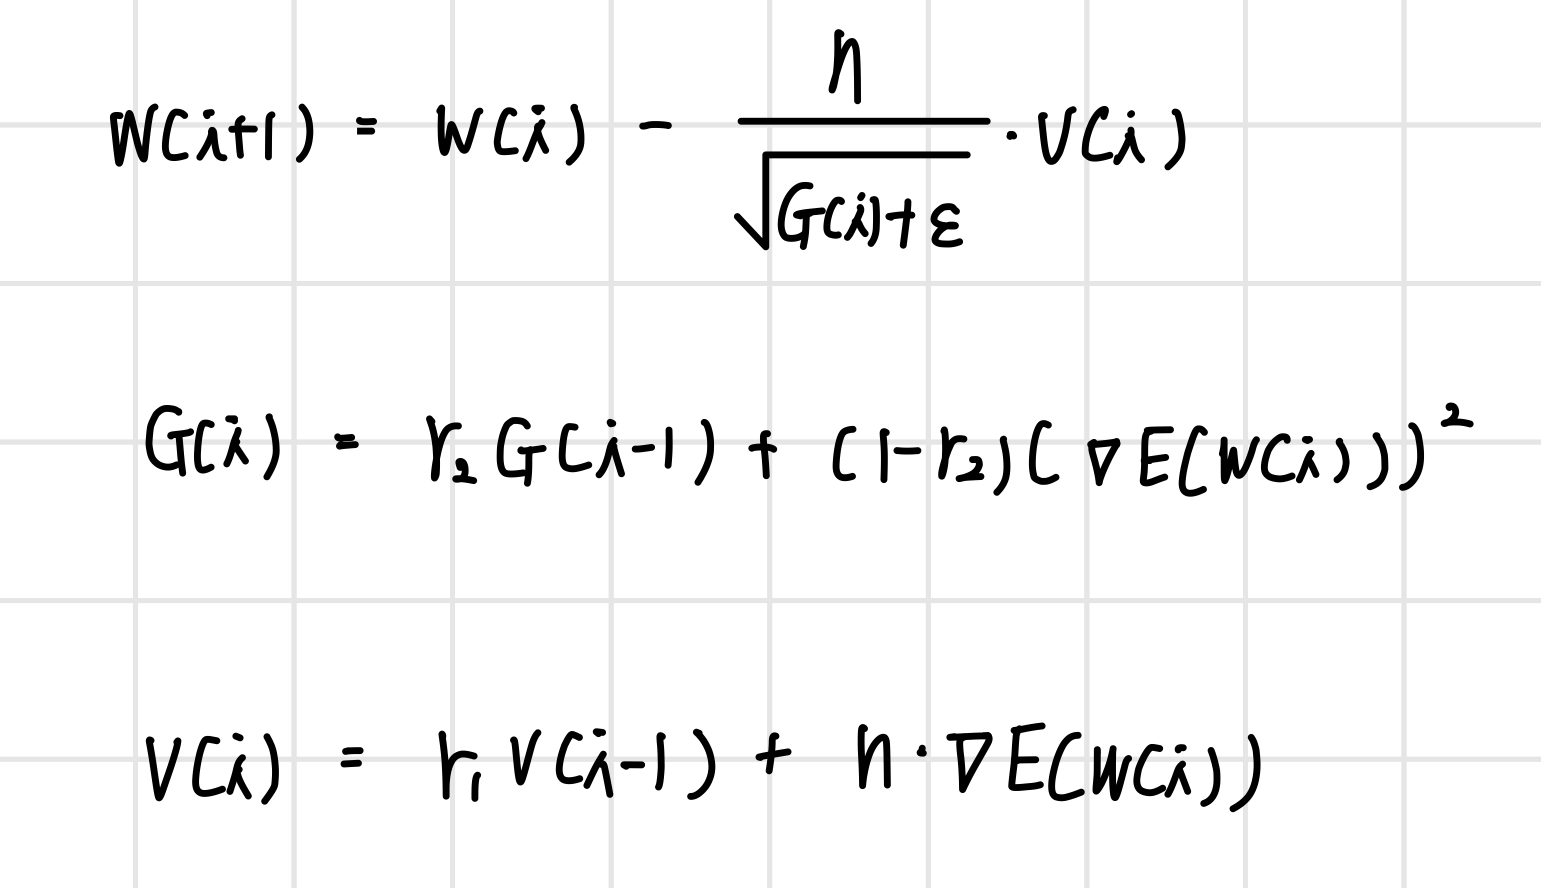

In [29]:
Image('image/아담.png')

optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 학습률 기본값은 1e-3

## 딥러닝을 사용할 때 이점
- 특성 추출 : 데이터별로 어떤 특징을 가지고 있는지 찾아내고, 그것을 토대로 데이터를 벡터로 변환하는 작업
- 빅데이터의 효율적 활용 : 딥러닝 학습을 이용한 특성 추출은 데이터 사례가 많을수록 성능이 향상
    - 확보된 데이터가 적다면 딥러닝의 성능 향상을 기대하기 어렵기 때문에 머신러닝을 고려해 봐야 함